*Import Libraries*

In [2]:
import numpy as np
import tensorflow as tf                                                       # print(tf.__version__)
from tensorflow import keras
from keras.datasets import fashion_mnist, mnist
import matplotlib.pyplot as plt

**Function**

In [3]:
def plot_history(history, fig_size=(5,3)):
  _, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_size)
  
  axs[0].plot(history.history["loss"], label="train loss")
  axs[0].plot(history.history["val_loss"], label="validation loss")
  axs[0].set_xlabel("Epochs", fontsize=10)
  axs[0].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
  axs[0].grid(visible="on", which="major", axis="y", alpha=0.4, color="gray", linestyle="--")
  axs[0].set_yticks(np.round(axs[0].get_yticks(),2))
  # yticks = np.round(axs[0].get_yticks(),2), axs[0].set_ylim(yticks[0]-yticks[0]*0.001, yticks[-1]+yticks[-1]*0.001)
  
  axs[1].plot(history.history["accuracy"], label="train accuracy")
  axs[1].plot(history.history["val_accuracy"], label="validation accuracy")
  axs[1].set_xlabel("Epochs", fontsize=10)
  axs[1].legend(fontsize=10, ncol=1, frameon=False, loc='best', labelcolor='linecolor', handlelength=0)
  axs[1].grid(visible="on", which="major", axis="y", alpha=0.4, color="gray", linestyle="--")
  axs[1].set_yticks(np.round(axs[1].get_yticks(),2))
  # yticks = np.round(axs[1].get_yticks(),2), axs[1].set_ylim(yticks[0]-yticks[0]*0.001, yticks[-1]+yticks[-1]*0.001)
  
  plt.autoscale(enable=True, axis="x", tight=True)

*Step 1. Load data*<br/>
Path data: C:\Users\name pc\.keras<br/>
[MNIST Dataset](https://www.tensorflow.org/datasets/catalog/mnist)<br>
[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [4]:
name = 2                                                                        # 1:mnist; 2:fashion_mnist
if name==1:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()                    # 70,000 28x28
else:
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()            # 70,000 28x28
print(f"x_train.shape:{x_train.shape}")                                         # (60000, 28, 28) = (Number of images, 28 , 28)
print(f"x_test.shape:{x_test.shape}")                                           # (10000, 28, 28) = (Number of images, 28 , 28)
print(f"y_train.shape:{y_train.shape}")                                         # (60000,) = (Number of label)
print(f"y_test.shape:{y_test.shape}")                                           # (10000,) = (Number of label)
print(f"y_train[:10]:{y_train}")                                                # Train labels
print(f"x_train[0,]: {x_train[0, 0:2, :]}")                                     # (Image 0, 0:2 out of 28, 28) ==> Ankle boot
labels = np.unique(y_train)
print(f"labels: {labels}")

x_train.shape:(60000, 28, 28)
x_test.shape:(10000, 28, 28)
y_train.shape:(60000,)
y_test.shape:(10000,)
y_train[:10]:[9 0 0 ... 3 0 5]
x_train[0,]: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
labels: [0 1 2 3 4 5 6 7 8 9]


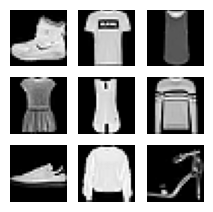

In [5]:
plt.figure(figsize=(2.5, 2.5))
for i in range(len(labels)-1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i, :, :], cmap='gray')
    plt.autoscale(axis="both", tight=True, enable=True)
    plt.axis("off")

*Step 2. Normalize data*<br/>
pixel values between 0 and 255; Scale these values to a range of 0 to 1 before feeding them to the neural network model.

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0    

*Step 3. Creating a Sequential model*<br/>
[Sequential model](https://keras.io/guides/sequential_model/)<br/>
[Dense layer](https://keras.io/api/layers/core_layers/dense/)<br/>
[Activation functions](https://keras.io/api/layers/activations/)<br/>
[Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/)<br/>

In [7]:
# Define Sequential model with 3 layers using 2 methods
def building_model(x_train,units_layer1, units_layer2, units_output, fun_output, method):
    global model
    if method==1:
        model = keras.models.Sequential()
        model.add(keras.layers.Flatten(input_shape=x_train.shape[1:3]))         # Layer input : Input must be vectored; x_train.shape[1:3]:(28, 28)
        model.add(keras.layers.Dense(units_layer1, activation="relu"))          # Layer 1: The first hidden layer
        model.add(keras.layers.Dense(units_layer2, activation="relu"))          # Layer 2: The second hidden layer
        model.add(keras.layers.Dense(units_output, activation=fun_output))      # Layer output or 3: 10 neuron = 10 class; Multi classification then activation is softmax
    elif method==2:
        model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
            keras.layers.Dense(units_layer1,activation="relu"),
            keras.layers.Dense(units_layer2, activation="relu"),
            keras.layers.Dense(units_output, activation=fun_output)])
    return model
model= building_model(x_train,units_layer1=100, units_layer2=75, units_output=10, fun_output="softmax", method=2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


*Step 3.1: Print the model parameters*

In [8]:
model.layers

In [9]:
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"weights:{weights}; weights.shape: {weights.shape}")
print(f" bias: {bias}; bias.shape: {bias.shape}")

weights:[[-0.01301002  0.07239966 -0.01147076 ... -0.05350448  0.07866789
   0.00980883]
 [-0.08051176  0.01797782  0.07864107 ...  0.00250035 -0.02011127
  -0.02253201]
 [-0.05593298 -0.02960416  0.03825638 ... -0.06567328 -0.00721363
   0.07442039]
 ...
 [ 0.01599301  0.00857411  0.0530322  ...  0.04667221 -0.06651527
  -0.05046711]
 [ 0.04345311  0.00835971  0.05802771 ...  0.00680334  0.08015469
   0.01146331]
 [-0.07029796 -0.01793128  0.03657342 ... -0.02869292  0.00955582
   0.0428521 ]]; weights.shape: (784, 100)
 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; bias.shape: (100,)


*Step 4. [Compile Model](https://keras.io/api/models/model_training_apis/)*<br/>
[Metrics](https://keras.io/api/metrics/)<br/>

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]) # Multi Classification:sparse_categorical_crossentropy

*Step 5: [Fit method](https://keras.io/api/models/model_training_apis/)*<br/>

In [11]:
history_train = model.fit(x_train, y_train, epochs=15, validation_split=0.15)

Epoch 1/15
1594/1594 [==============================] - 7s 4ms/step - loss: 0.7957 - accuracy: 0.7336 - val_loss: 0.5585 - val_accuracy: 0.8084
Epoch 2/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5053 - accuracy: 0.8262 - val_loss: 0.4966 - val_accuracy: 0.8281
Epoch 3/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4579 - accuracy: 0.8397 - val_loss: 0.4768 - val_accuracy: 0.8297
Epoch 4/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4301 - accuracy: 0.8497 - val_loss: 0.4304 - val_accuracy: 0.8481
Epoch 5/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4117 - accuracy: 0.8568 - val_loss: 0.4494 - val_accuracy: 0.8391
Epoch 6/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8606 - val_loss: 0.4209 - val_accuracy: 0.8514
Epoch 7/15
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3828 - accuracy: 0.8650 - val_loss: 0.4217 - val_accuracy:

*Step 5.1: Print the history parameters*

In [12]:
print(f" history_params: {history_train.params}")
print(f"\n Loss_train: {history_train.history['loss']}")                              # print(f"history.history: {history.history}")
print(f"\n Accuracy_train: {history_train.history['accuracy']}")
print(f"\n Loss_validation: {history_train.history['val_loss']}")
print(f"\n Accuracy_validation: {history_train.history['val_accuracy']}")

 history_params: {'verbose': 1, 'epochs': 15, 'steps': 1594}

 Loss_train: [0.7957248091697693, 0.5053197145462036, 0.4579489827156067, 0.4300539195537567, 0.41168978810310364, 0.39649713039398193, 0.382784366607666, 0.37251535058021545, 0.3631672263145447, 0.35507968068122864, 0.34513184428215027, 0.3377755880355835, 0.3313189446926117, 0.3243410289287567, 0.3186275362968445]

 Accuracy_train: [0.7335686087608337, 0.8261960744857788, 0.8396666646003723, 0.8497058749198914, 0.8567647337913513, 0.8606274724006653, 0.864960789680481, 0.8694705963134766, 0.8710588216781616, 0.8747059106826782, 0.8763921856880188, 0.8799019455909729, 0.8811176419258118, 0.8839019536972046, 0.8859411478042603]

 Loss_validation: [0.5584805011749268, 0.49659910798072815, 0.47679024934768677, 0.43036583065986633, 0.4493606388568878, 0.4209422469139099, 0.4217391610145569, 0.4453945457935333, 0.3875589370727539, 0.37324580550193787, 0.3797737658023834, 0.36642593145370483, 0.3630236089229584, 0.360291570425033

*Step 5.2: Plot*

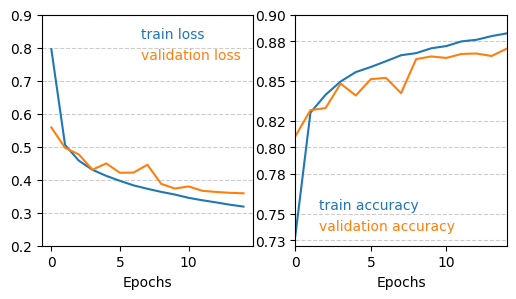

In [13]:
plot_history(history_train, fig_size=(6,3))

*Step 6: [Evaluate Model](https://keras.io/api/models/model_training_apis/)*


In [14]:
history_test = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8657


Step 7: Predict Model

In [15]:
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")


1/1 [==============================] - 0s 297ms/step

 pred.shape: (4, 28, 28)

 pred_x_test: [[0.    0.    0.    0.    0.    0.046 0.    0.172 0.001 0.781]
 [0.    0.    0.995 0.    0.003 0.    0.002 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]

 labels_pred: [9 2 1 1], y_test: [9 2 1 1]


**[Vanishing/exploding gradients](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
- Initialization
  - [Article](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
- Nonsaturating activation functions
- Batch normalization
- Gradient clipping

**[Time](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
 - Momentum optimization
 - Nesterov
 - AdaGrad
 - RMSProp
 - Adam and Nadam
 - Learning rate scheduling

**[Limited data](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
 - [Transfer learning & fine-tuning](https://keras.io/guides/transfer_learning/)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 75)                7575      
                                                                 
 dense_5 (Dense)             (None, 50)                3800      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
Total params: 90385 (353.07 KB)
Trainable params: 90385 (353.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

weights: 8
trai

c:\Users\Reza\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



 shape_model_old: (784, 100); initial_weights_values_model_old: [[ 0.02766811  0.00605695  0.06505048 ... -0.02953223 -0.02026813
  -0.00378417]
 [ 0.02313363 -0.01753311  0.02608818 ... -0.05963406 -0.00656746
   0.07393815]
 [-0.05475283 -0.02529185 -0.05374459 ...  0.04472759 -0.07557097
   0.0570382 ]
 ...
 [-0.03345346 -0.04956043  0.00875096 ... -0.00942817 -0.0292559
   0.03399401]
 [ 0.07401615 -0.02838432  0.02975584 ...  0.02430343  0.04424433
   0.01402808]
 [ 0.03167161  0.06665424  0.02775939 ...  0.01045237  0.07307877
  -0.07296612]]
False
False
False
False
Epoch 1/5
133/133 [==============================] - 1s 4ms/step - loss: 0.2559 - accuracy: 0.9042 - val_loss: 0.1225 - val_accuracy: 0.9667
Epoch 2/5
133/133 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 0.9579 - val_loss: 0.0979 - val_accuracy: 0.9760
Epoch 3/5
133/133 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9642 - val_loss: 0.0847 - val_accuracy: 0.98

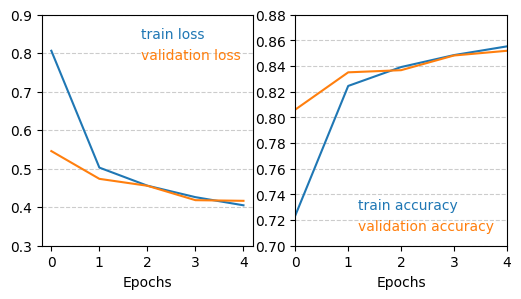

In [16]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100, activation="relu"),
                                keras.layers.Dense(units=75, activation="relu"),
                                keras.layers.Dense(units=50, activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
print(f"\nweights:", len(model.weights))
print(f"trainable_weights:", len(model.trainable_weights))
print(f"non_trainable_weights:", len(model.non_trainable_weights))
print(f"\n shape: {model.get_weights()[0].shape}; initial_weights_values: {model.get_weights()[0]}")  # Keep a copy of the weights of layer1 for later reference
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))
# ========================================================== Save model ==============================================================
model.save("model_old.h5")
# ========================================================== Load model ==============================================================
model_old = keras.models.load_model("model_old.h5")
print(f"\n shape_model_old: {model_old.get_weights()[0].shape}; initial_weights_values_model_old: {model_old.get_weights()[0]}")  # Keep a copy of the weights of layer1 for later 
# ========================================================= Clone old model ==========================================================
model_old_cloned = keras.models.clone_model(model_old)
model_old_cloned.set_weights(model_old.get_weights())
# ======================================================= Build the new model ========================================================
model_new = keras.models.Sequential(model_old.layers[:-1])   # Build a new model by taking the model_old and excluding the final layer
model_new.add(keras.layers.Dense(1, activation="sigmoid"))   # sigmoid for predict a class
# ========================================================= Freeze layers ============================================================
for layer in model_old.layers[:-1]:                          # Freeze all layers except the final layer
   layer.trainable = False
   print(layer.trainable)
# ===================================================== Compile the new model ========================================================
model_new.compile(loss="binary_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
# ======================================================= Fit the new model ==========================================================
y_train_new = np.where(y_train==3, 1, 0)[:5000]
x_train_new = x_train[:5000, : , :]
history_train_new = model_new.fit(x_train_new, y_train_new, epochs=5, validation_split=0.15)
# ======================================================== Compare weights ===========================================================
print(f"\n {model.get_weights()[0] = }") 
print(f"\n {model_old_cloned.get_weights()[0] = }") 
print(f"\n {model_new.get_weights()[0] = }") 

Epoch 1/5
133/133 [==============================] - 1s 6ms/step - loss: 0.1027 - accuracy: 0.9704 - val_loss: 0.0661 - val_accuracy: 0.9853
Epoch 2/5
133/133 [==============================] - 1s 6ms/step - loss: 0.0991 - accuracy: 0.9711 - val_loss: 0.0628 - val_accuracy: 0.9840
Epoch 3/5
133/133 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0598 - val_accuracy: 0.9853
Epoch 4/5
133/133 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.9711 - val_loss: 0.0576 - val_accuracy: 0.9853
Epoch 5/5
133/133 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9715 - val_loss: 0.0557 - val_accuracy: 0.9853

 model.get_weights()[0] = array([[ 0.02766811,  0.00605695,  0.06505048, ..., -0.02953223,
        -0.02026813, -0.00378417],
       [ 0.02313363, -0.01753311,  0.02608818, ..., -0.05963406,
        -0.00656746,  0.07393815],
       [-0.05475283, -0.02529185, -0.05374459, ...,  0.04472759,
   

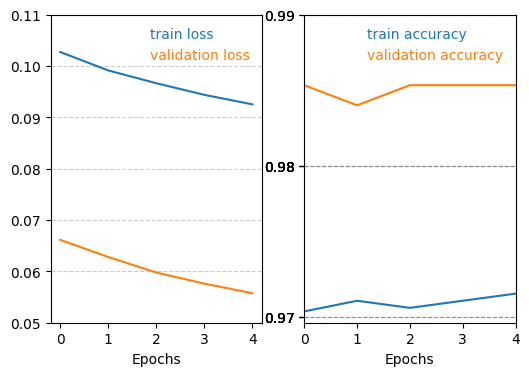

In [17]:
# ======================================================= Fit the new model ==========================================================
y_train_new = np.where(y_train==3, 1, 0)[:5000]
y_test_new = np.where(y_test==3, 1, 0)
x_train_new = x_train[:5000, : , :]
history_train_new = model_new.fit(x_train_new, y_train_new, epochs=5, validation_split=0.15)
# ======================================================== Compare weights ===========================================================
print(f"\n {model.get_weights()[0] = }") 
print(f"\n {model_old_cloned.get_weights()[0] = }") 
print(f"\n {model_new.get_weights()[0] = }") 
# ======================================================= Evaluate the model =========================================================
history_test_new = model_new.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:][:5000]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train_new, fig_size=(6, 4))

**[Overfitting](https://hooshio.com/wp-content/uploads/2021/12/2-Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)**
- `L1 and L2 regularization` 
  - `kernel_regularizer:` Regularizer to apply a penalty on the layer's kernel
  - `bias_regularizer:` Regularizer to apply a penalty on the layer's bias
  - `activity_regularizer:` Regularizer to apply a penalty on the layer's output
  - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)
  - [link 2](https://keras.io/api/layers/regularizers/)
- `Dropout` 
   - [Article 1](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
   - [Article 2](https://proceedings.mlr.press/v48/gal16.pdf)
   - [link 1](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)
   - [AlphaDropout:](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AlphaDropout) It fits well to Scaled Exponential Linear Units by randomly setting activations to the negative saturation value.
- `Max-Norm`
   - [link](https://keras.io/api/layers/constraints/#:~:text=MaxNorm%20class&text=Constrains%20the%20weights%20incident%20to,constraints.)

*L1 and L2 regularization*

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 75)                7575      
                                                                 
 dense_10 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 weights:[[ 0.06130172  0.01838233 -0.03243448 ...  0.06711315 -0.00511757
   0.00114021]
 [-0.07448087  0.06705151  0.04486521 ...  0.01076704  0.

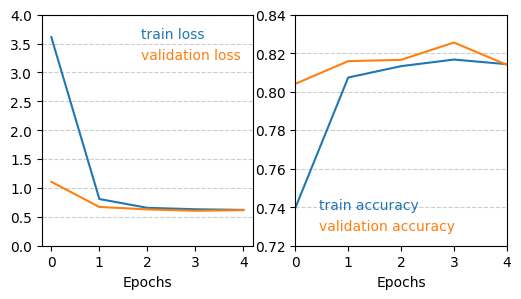

In [18]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100,
                                                   # kernel_regularizer=keras.regularizers.L1(0.3),   # L1 Regularization Penalty
                                                   kernel_regularizer=keras.regularizers.L2(0.05),    # L2 Regularization Penalty
                                                   # kernel_regularizer=keras.regularizers.L1L2(l1=0.01, l2=0.01),  # L1 + L2 penalties
                                                   # kernel_initializer="he_normal"
                                                   activation="relu"),
                                keras.layers.Dense(units=75, 
                                                   # kernel_regularizer=keras.regularizers.l2(0.01),
                                                   activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))

*Dropout*

In [22]:
# ====================================================== MonteCarlo Dropout ==========================================================
class MonteCarloDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 75)                7575      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



 weights:[[ 0.04194149 -0.04643986 -0.04325362 ... -0.04933272 -0.02917187
   0.05301411]
 [ 0.05033749 -0.03098015 -0.0760308  ...  0.06976505 -0.0161413
  -0.06821293]
 [-0.03914872  0.05158997  0.00927243 ... -0.05196491  0.07877986
  -0.06239304]
 ...
 [ 0.0604457   0.06829248 -0.03708952 ...  0.02578248  0.01401234
   0.08205643]
 [-0.05352925 -0.0319274  -0.02035642 ...  0.01777811  0.05768318
   0.06152898]
 [ 0.07222562  0.01967176  0.00902982 ... -0.0414807  -0.05139922
  -0.0716743 ]]; 
 weights.shape: (784, 100)

 bias: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]; 
 bias.shape: (100,)
Epoch 1/5
1594/1594 [==============================] - 9s 5ms/step - loss: 0.8856 - accuracy: 0.6980 - val_loss: 0.5903 - val_accuracy

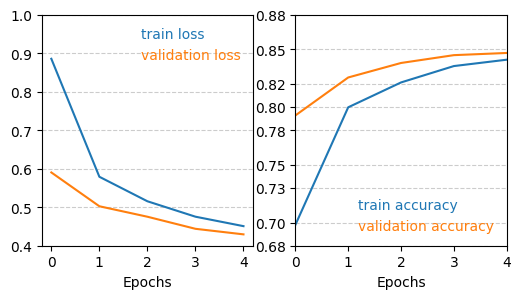

In [23]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),               # x_train.shape[1:3]:(28, 28)
                                # keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=100, activation="relu"),
                                # keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=75, activation="relu"),
                                keras.layers.Dropout(0.2),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ============================================== Predict the model using dropout =====================================================
model_dropout = np.stack([model(x_test, training=True) for _ in range(60)])
model_dropout = np.round(np.mean(model_dropout, axis=0)[0:4], 3)
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))

*Max-Norm*

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dense_18 (Dense)            (None, 75)                7575      
                                                                 
 dense_19 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

 weights:[[ 0.03495763  0.03224391  0.05297485 ... -0.0382762   0.01598148
   0.07569414]
 [-0.04633507 -0.03473151  0.0179666  ...  0.07226112 -0.

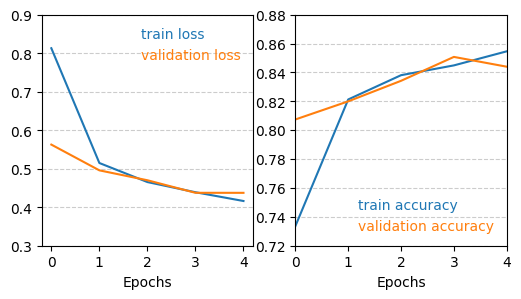

In [24]:
# ======================================================== Build the model ===========================================================
model = keras.models.Sequential([keras.layers.Flatten(input_shape=x_train.shape[1:3]),                # x_train.shape[1:3]:(28, 28)
                                keras.layers.Dense(units=100,
                                                   kernel_constraint=keras.constraints.max_norm(1.0),
                                                   activation="relu"),
                                keras.layers.Dense(units=75, 
                                                   activation="relu"),
                                keras.layers.Dense(units=len(np.unique(y_train)), activation="softmax")])
model.summary()
weights, bias = model.layers[1].get_weights()                                 # weights & bias in first layer
print(f"\n weights:{weights}; \n weights.shape: {weights.shape}")
print(f"\n bias: {bias}; \n bias.shape: {bias.shape}")
# ======================================================= Compile the model ==========================================================
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# ========================================================= Fit the model ============================================================
history_train = model.fit(x_train, y_train, epochs=5, validation_split=0.15)
# ======================================================= Evaluate the model =========================================================
history_test = model.evaluate(x_test, y_test, verbose=1)
# ======================================================== Predict the model =========================================================
pred = x_test[0:4,:,:]
pred_x_test = model.predict(pred).round(3)
labels_pred = np.argmax(pred_x_test, axis=1)
print(f"\n pred.shape: {pred.shape}")
print(f"\n pred_x_test: {pred_x_test}")
print(f"\n labels_pred: {labels_pred}, y_test: {y_test[0:4]}")
# ======================================================== Plot the model ============================================================
plot_history(history_train, fig_size=(6,3))